***Target Column***
ACCLASS<br>
Required to transform into binary (0, 1):<br>
'Fatal' --> 1, <br>
'Non-Fatal Injury' --> 0, <br>
'Property Damage Only' --> 0, <br>
***5 nan value from this column, we can consider to drop them***



below columns need to fill values:
'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
'REDLIGHT', 'ALCOHOL', 'DISABILITY'
fill Nan as No, and transform to 0, 1
(Default they are Yes, Nan values)
ROAD_CLASS fill most freq value
DISTRICT fill most freq value

Questionable column:
CYCCOND: multi categories, fill Nan as most freq value??


From the dataset, below columns are unnecessary:
ObjectId, HEIGHBOURHOOD_158, HEIGHBOURHOOD_140, CYCLISTYPE(too much categories and too much Nan value),<br>
PEDCOND(too much categories and too much Nan value), PEDACT(too much categories and too much Nan value),<br>
PEDTYPE (too much categories and too much Nan value), DRICOND ('other' included, means it is not a accuracy value), DRIVACT ('other' included, means it is not a accuracy value), MANOEUVER('other' included, means it is not a accuracy value)<br>
FATAL_NO, INVTYPE, DATE, YEAR, ACCNUM, INDEX_, STREET1, STREET2, OFFSET, X, Y,INJURY



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Group Project - KSI data - Classification problem

In [11]:
dataset_path = r"/content/KSI.csv"

df = pd.read_csv(dataset_path)

In [12]:
df.head(5)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,1
1,-8.844611e+06,5.412414e+06,3387731,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,2
2,-8.816480e+06,5.434843e+06,3388101,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,3
3,-8.829728e+06,5.419071e+06,3389067,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,-8.816480e+06,5.434843e+06,3388102,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,5


In [ ]:
# Drop rows which YEAR is 2020 or 2021 (COVID-19 pandemic)
#df = df[~df['YEAR'].isin([2020, 2021])]

In [ ]:
# Drop rows which has duplicate ACCNUM, same ACCNUM means same accident
#df = df.drop_duplicates(subset='ACCNUM', keep='first')

# Exploration <br>
Use below code to display categrial data and null counts

In [13]:
print(df['ROAD_CLASS'].value_counts())
print(df['ROAD_CLASS'].isnull().sum())

ROAD_CLASS
Major Arterial         12956
Minor Arterial          2840
Collector                996
Local                    841
Expressway               132
Other                     25
Laneway                   11
Expressway Ramp            9
Pending                    7
Major Arterial Ramp        1
Name: count, dtype: int64
376


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [ ]:
df.columns.values

array(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId'], dtype=object)

# Determine columns

In [15]:
#Since 5 rows are missing target values (ACCLASS), we will remove them
df = df.dropna(subset=['ACCLASS'])

#We will remove the columns that are not useful for our model
meaningless_columns = ['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1',
                       'STREET2', 'OFFSET', 'FATAL_NO', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140',
                       'ObjectId', 'WARDNUM', 'DIVISION']

too_much_missing = ['PEDTYPE','CYCACT', 'CYCLISTYPE', 'PEDACT', 'CYCCOND', 'MANOEUVER', 'INITDIR']

#We will remove the columns with duplicate information
# X and Y are the same as LONGITUDE and LATITUDE
# VEHTYPE, PEDCOND, DRIVCOND, IMPACTYPE, DRIVACT duplicated because there are categorical columns for the same information
duplicated_columns = ['X', 'Y', 'VEHTYPE', 'PEDCOND', 'DRIVCOND', 'IMPACTYPE','LOCCOORD', 'HOOD_140', 'DRIVACT']


#columns need to fill Nan values
binary_map = {np.nan: 'No'}
fill_nan_columns = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
                    'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
                    'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'INJURY']

#columns which contain categorical data
categorical_columns = ['LIGHT', 'INVAGE', 'RDSFCOND',
                       'DISTRICT', 'ROAD_CLASS', 'TRAFFCTL',
                       'ACCLOC', 'VISIBILITY','INVTYPE']

try_exclude = ['ROAD_CLASS', 'TRAFFCTL', 'ACCLOC']



In [16]:
# Create a copy of the dataframe
df_origin = df.copy()

In [17]:
#drop meaningless columns, duplicated columns and columns with too much missing values
df = df.drop(columns=meaningless_columns)
df = df.drop(columns=duplicated_columns)
df = df.drop(columns=too_much_missing)


# Dealing with columns which contains many catefories

In [18]:
#Simplfy the categorical data
# LIGHT
# Daylight                10385
# Dark                     3687
# Dark, artificial         3300
# Dusk                      240
# Dusk, artificial          219
# Daylight, artificial      141
# Dawn                      110
# Dawn, artificial          101
# Other                       6

#We will simplify the LIGHT column to Daylight, Dark, Dusk, Dawn, Other
light_map = {
    'Daylight': 'Daylight',
    'Dark': 'Dark',
    'Dark, artificial': 'Dark',
    'Dusk': 'Dusk',
    'Dusk, artificial': 'Dusk',
    'Daylight, artificial': 'Daylight',
    'Dawn': 'Dawn',
    'Dawn, artificial': 'Dawn',
    'Other': 'Other'
    }

df['LIGHT'] = df['LIGHT'].map(light_map)

# IMPACTYPE
# Pedestrian Collisions     7293
# Turning Movement          2792
# Cyclist Collisions        1795
# Rear End                  1746
# SMV Other                 1457
# Angle                     1283
# Approaching                928
# Sideswipe                  506
# Other                      195
# SMV Unattended Vehicle     190
# Name: count, dtype: int64
# Null Values: 4

#Pedestrian, Cyclist are representing IMPACTYPE column, so we will drop it

# INVAGE
# unknown     2609
# 20 to 24    1710
# 25 to 29    1638
# 30 to 34    1384
# 35 to 39    1311
# 50 to 54    1302
# 40 to 44    1274
# 45 to 49    1239
# 55 to 59    1098
# 60 to 64     877
# 15 to 19     852
# 65 to 69     681
# 70 to 74     529
# 75 to 79     434
# 80 to 84     336
# 10 to 14     249
# 85 to 89     212
# 5 to 9       199
# 0 to 4       177
# 90 to 94      63
# Over 95       15
# Name: count, dtype: int64
# Null Values: 0

#We will simplify the INVAGE column to 0 to 20, 20 to 40, 40 to 60, 60 to 80, over 80
invage_map = {
    'unknown': 'unknown',
    '20 to 24': '20 to 39',
    '25 to 29': '20 to 39',
    '30 to 34': '20 to 39',
    '35 to 39': '20 to 39',
    '50 to 54': '40 to 59',
    '40 to 44': '40 to 59',
    '45 to 49': '40 to 59',
    '55 to 59': '40 to 59',
    '60 to 64': '60 to 79',
    '15 to 19': '0 to 19',
    '65 to 69': '60 to 79',
    '70 to 74': '60 to 79',
    '75 to 79': '60 to 79',
    '80 to 84': 'over 79',
    '10 to 14': '0 to 19',
    '85 to 89': 'over 79',
    '5 to 9': '0 to 19',
    '0 to 4': '0 to 19',
    '90 to 94': 'over 79',
    'Over 95': 'over 79'
    }

df['INVAGE'] = df['INVAGE'].map(invage_map)

# RDSFCOND
# Dry                     14594
# Wet                      3021
# Loose Snow                169
# Other                     145
# Slush                     102
# Ice                        77
# Packed Snow                44
# Loose Sand or Gravel       11
# Spilled liquid              1
# Name: count, dtype: int64
# Null Values: 25

#We will simplify the RDSFCOND column to Dry, Wet, Snow, Ice, Other
rdsfcond_map = {
    'Dry': 'Dry',
    'Wet': 'Wet',
    'Loose Snow': 'Wet',
    'Other': 'Other',
    'Slush': 'Wet',
    'Ice': 'Wet',
    'Packed Snow': 'Wet',
    'Loose Sand or Gravel': 'Other',
    'Spilled liquid': 'Other'
    }

df['RDSFCOND'] = df['RDSFCOND'].map(rdsfcond_map)

# fill the missing values with other
df['RDSFCOND'] = df['RDSFCOND'].fillna('Other')

# DISTRICT
# Toronto and East York    6125
# Etobicoke York           4207
# Scarborough              4111
# North York               3637
# Toronto East York           4
# Name: count, dtype: int64
# Null Values: 105

# DISTRICT column has 105 missing values, we will fill them with the most frequent value
df['DISTRICT'] = df['DISTRICT'].fillna(df['DISTRICT'].mode()[0])

# DRIVACT
# Driving Properly                4221
# Failed to Yield Right of Way    1541
# Lost control                     975
# Improper Turn                    573
# Other                            504
# Disobeyed Traffic Control        475
# Following too Close              251
# Exceeding Speed Limit            246
# Speed too Fast For Condition     208
# Improper Lane Change             122
# Improper Passing                 112
# Wrong Way on One Way Road          9
# Speed too Slow                     4
# Name: count, dtype: int64
# Null Values: 8948

#Redlight, Speeding, Ag_Driv, Alcohol, Disability are representing DRIVACT column, so we will drop it

# INITDIR
# East       3259
# West       3197
# South      3106
# North      3066
# Unknown     510
# Name: count, dtype: int64
# Null Values: 5051

# INITDIR column has 5051 missing values, we will drop it

# ROAD_CLASS
# Major Arterial         12951
# Minor Arterial          2840
# Collector                996
# Local                    841
# Expressway               132
# Other                     25
# Laneway                   11
# Expressway Ramp            9
# Pending                    7
# Major Arterial Ramp        1
# Name: count, dtype: int64
# Null Values: 376

# Simplify the ROAD_CLASS column to Major Arterial, Minor Arterial, Collector, Local, Other
road_class_map = {
    'Major Arterial': 'Major Arterial',
    'Minor Arterial': 'Minor Arterial',
    'Collector': 'Collector',
    'Local': 'Local',
    'Expressway': 'Other',
    'Other': 'Other',
    'Laneway': 'Other',
    'Expressway Ramp': 'Other',
    'Pending': 'Other',
    'Major Arterial Ramp': 'Other'
    }

df['ROAD_CLASS'] = df['ROAD_CLASS'].map(road_class_map)

# Fill the missing values with Other
df['ROAD_CLASS'] = df['ROAD_CLASS'].fillna('Other')

# TRAFFCTL
# No Control              8788
# Traffic Signal          7635
# Stop Sign               1380
# Pedestrian Crossover     198
# Traffic Controller       108
# Yield Sign                21
# Streetcar (Stop for)      16
# Traffic Gate               5
# School Guard               2
# Police Control             2
# Name: count, dtype: int64
# Null Values: 34

# Simplyfy the TRAFFCTL column to No Control, Traffic Signal, Stop Sign, Other
traffctl_map = {
    'No Control': 'No Control',
    'Traffic Signal': 'Traffic Signal',
    'Stop Sign': 'Stop Sign',
    'Pedestrian Crossover': 'Other',
    'Traffic Controller': 'Other',
    'Yield Sign': 'Other',
    'Streetcar (Stop for)': 'Other',
    'Traffic Gate': 'Other',
    'School Guard': 'Other',
    'Police Control': 'Other'
    }

df['TRAFFCTL'] = df['TRAFFCTL'].map(traffctl_map)

# Fill the missing values with Other
df['TRAFFCTL'] = df['TRAFFCTL'].fillna('Other')

# ACCLOC
# At Intersection          8689
# Non Intersection         2420
# Intersection Related     1200
# At/Near Private Drive     379
# Overpass or Bridge         17
# Laneway                    14
# Private Driveway           13
# Underpass or Tunnel         6
# Trail                       1
# Name: count, dtype: int64
# Null Values: 5450

# Simplyfy the ACCLOC column to At Intersection, Non Intersection, Other
accloc_map = {
    'At Intersection': 'At Intersection',
    'Non Intersection': 'Non Intersection',
    'Intersection Related': 'At Intersection',
    'At/Near Private Drive': 'Other',
    'Overpass or Bridge': 'Other',
    'Laneway': 'Other',
    'Private Driveway': 'Other',
    'Underpass or Tunnel': 'Other',
    'Trail': 'Other'
    }

df['ACCLOC'] = df['ACCLOC'].map(accloc_map)

# Fill the missing values with Other
df['ACCLOC'] = df['ACCLOC'].fillna('Other')

# VISIBILITY
# Clear                     15714
# Rain                       1879
# Snow                        351
# Other                        97
# Fog, Mist, Smoke, Dust       50
# Freezing Rain                47
# Drifting Snow                21
# Strong wind                  10
# Name: count, dtype: int64
# Null Values: 20

# Simplyfy the VISIBILITY column to Clear, Rain, Snow, Other

visibility_map = {
    'Clear': 'Clear',
    'Rain': 'Not Clear',
    'Snow': 'Not Clear',
    'Other': 'Other',
    'Fog, Mist, Smoke, Dust': 'Not Clear',
    'Freezing Rain': 'Not Clear',
    'Drifting Snow': 'Not Clear',
    'Strong wind': 'Other'
    }

df['VISIBILITY'] = df['VISIBILITY'].map(visibility_map)

# Fill the missing values with Other
df['VISIBILITY'] = df['VISIBILITY'].fillna('Other')

# INVTYPE
# Driver                  8274
# Pedestrian              3110
# Passenger               2766
# Vehicle Owner           1637
# Cyclist                  784
# Motorcycle Driver        697
# Truck Driver             346
# Other Property Owner     257
# Other                    186
# Motorcycle Passenger      39
# Moped Driver              30
# Driver - Not Hit          17
# Wheelchair                17
# In-Line Skater             5
# Cyclist Passenger          3
# Trailer Owner              2
# Pedestrian - Not Hit       1
# Witness                    1
# Moped Passenger            1
# Name: count, dtype: int64
# Null Values: 16

# Simplyfy the INVTYPE column to Driver, Pedestrian, Passenger, Vehicle Owner, Cyclist, Other

invtype_map = {
    'Driver': 'Driver',
    'Pedestrian': 'Pedestrian',
    'Passenger': 'Passenger',
    'Vehicle Owner': 'Vehicle Owner',
    'Cyclist': 'Cyclist',
    'Motorcycle Driver': 'Driver',
    'Truck Driver': 'Driver',
    'Other Property Owner': 'Other',
    'Other': 'Other',
    'Motorcycle Passenger': 'Passenger',
    'Moped Driver': 'Other',
    'Driver - Not Hit': 'Other',
    'Wheelchair': 'Other',
    'In-Line Skater': 'Other',
    'Cyclist Passenger': 'Passenger',
    'Trailer Owner': 'Vehicle Owner',
    'Pedestrian - Not Hit': 'Other',
    'Witness': 'Other',
    'Moped Passenger': 'Passenger'
    }

df['INVTYPE'] = df['INVTYPE'].map(invtype_map)

# Fill the missing values with Other
df['INVTYPE'] = df['INVTYPE'].fillna('Other')

# MANOEUVER
# Going Ahead                            6265
# Turning Left                           1786
# Stopped                                 620
# Turning Right                           476
# Slowing or Stopping                     282
# Changing Lanes                          216
# Parked                                  183
# Other                                   181
# Reversing                               122
# Unknown                                 122
# Making U Turn                           106
# Overtaking                               91
# Pulling Away from Shoulder or Curb       40
# Pulling Onto Shoulder or towardCurb      18
# Merging                                  18
# Disabled                                  4
# Name: count, dtype: int64
# Null Values: 7659

# Too difficult to simplify and too much missing values, we will drop it



In [ ]:
print(df.columns.values)
print(len(df.columns.values))


['ROAD_CLASS' 'DISTRICT' 'LATITUDE' 'LONGITUDE' 'ACCLOC' 'TRAFFCTL'
 'VISIBILITY' 'LIGHT' 'RDSFCOND' 'ACCLASS' 'INVTYPE' 'INVAGE' 'INJURY'
 'PEDESTRIAN' 'CYCLIST' 'AUTOMOBILE' 'MOTORCYCLE' 'TRUCK' 'TRSN_CITY_VEH'
 'EMERG_VEH' 'PASSENGER' 'SPEEDING' 'AG_DRIV' 'REDLIGHT' 'ALCOHOL'
 'DISABILITY' 'HOOD_158']
27


In [7]:
# columns can try to exclude or include

#selected_categorical_columns = set(categorical_columns) - set(try_exclude)
selected_categorical_columns = categorical_columns
print(selected_categorical_columns)

['LIGHT', 'INVAGE', 'RDSFCOND', 'DISTRICT', 'ROAD_CLASS', 'TRAFFCTL', 'ACCLOC', 'VISIBILITY', 'INVTYPE']


In [25]:
# join selected_categorical_columns and fill_nan_columns
selected_cat_columns = list(selected_categorical_columns) + fill_nan_columns

print(selected_cat_columns)

['LIGHT', 'INVAGE', 'RDSFCOND', 'DISTRICT', 'ROAD_CLASS', 'TRAFFCTL', 'ACCLOC', 'VISIBILITY', 'INVTYPE', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'INJURY']


In [ ]:
#df = df.drop(columns=try_exclude, axis=1)

In [19]:
df[fill_nan_columns] = df[fill_nan_columns].fillna(value='No')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18189 entries, 0 to 18193
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROAD_CLASS     18189 non-null  object 
 1   DISTRICT       18189 non-null  object 
 2   LATITUDE       18189 non-null  float64
 3   LONGITUDE      18189 non-null  float64
 4   ACCLOC         18189 non-null  object 
 5   TRAFFCTL       18189 non-null  object 
 6   VISIBILITY     18189 non-null  object 
 7   LIGHT          18189 non-null  object 
 8   RDSFCOND       18189 non-null  object 
 9   ACCLASS        18189 non-null  object 
 10  INVTYPE        18189 non-null  object 
 11  INVAGE         18189 non-null  object 
 12  INJURY         18189 non-null  object 
 13  PEDESTRIAN     18189 non-null  object 
 14  CYCLIST        18189 non-null  object 
 15  AUTOMOBILE     18189 non-null  object 
 16  MOTORCYCLE     18189 non-null  object 
 17  TRUCK          18189 non-null  object 
 18  TRSN_CITY_V

In [21]:
#export the cleaned dataset
df.to_csv(r'dataset\KSI_cleaned.csv', index=False)

In [22]:
X = df.drop(columns=['ACCLASS'], axis=1)
y = df['ACCLASS']

data_map = {
    'Fatal': 1,
    'Non-Fatal Injury': 0,
    'Property Damage Only': 0
    }

y = y.map(data_map)


In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
df.dtypes

ROAD_CLASS        object
DISTRICT          object
LATITUDE         float64
LONGITUDE        float64
ACCLOC            object
TRAFFCTL          object
VISIBILITY        object
LIGHT             object
RDSFCOND          object
ACCLASS           object
INVTYPE           object
INVAGE            object
INJURY            object
PEDESTRIAN        object
CYCLIST           object
AUTOMOBILE        object
MOTORCYCLE        object
TRUCK             object
TRSN_CITY_VEH     object
EMERG_VEH         object
PASSENGER         object
SPEEDING          object
AG_DRIV           object
REDLIGHT          object
ALCOHOL           object
DISABILITY        object
HOOD_158          object
dtype: object

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE




In [26]:
#Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),

])

#Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', cat_transformer, selected_cat_columns),
    ])

#get transformed data
X_transformed = preprocessor.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)
print(X_transformed.shape, y.shape)

#Resample the data
smote = SMOTE(random_state=58)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)


(18189, 71) (18189,)


In [ ]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.0,0.000000,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31227,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,1.0
31228,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.150281,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,1.0
31229,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.000000,0.0
31230,0.0,0.0,1.0,0.0,0.0,0.0,0.552154,0.447846,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,1.0


In [27]:
y_resampled.value_counts()

ACCLASS
1    15616
0    15616
Name: count, dtype: int64

In [28]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=58)

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 8. Define 5 classifiers
logreg_X = LogisticRegression(max_iter=1400)
rf_X = RandomForestClassifier()
svm_X = SVC()
dt_X = DecisionTreeClassifier(criterion="entropy", max_depth=42)
et_X = ExtraTreesClassifier()

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

In [30]:
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_X),
    ('rf', rf_X),
    ('svm', svm_X),
    ('dt', dt_X),
    ('et', et_X)
], voting='hard')

In [31]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(max_iter=1400)),
                             ('rf', RandomForestClassifier()), ('svm', SVC()),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=42)),
                             ('et', ExtraTreesClassifier())])

In [49]:
import joblib
joblib.dump(voting_clf, 'voting_classifier_model.pkl')


['voting_classifier_model.pkl']

In [32]:
y_preds = voting_clf.predict(X_test)


In [38]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9532575636305427
Precision: 0.9720093302232589
Recall: 0.93344
F1-score: 0.9523343127652628


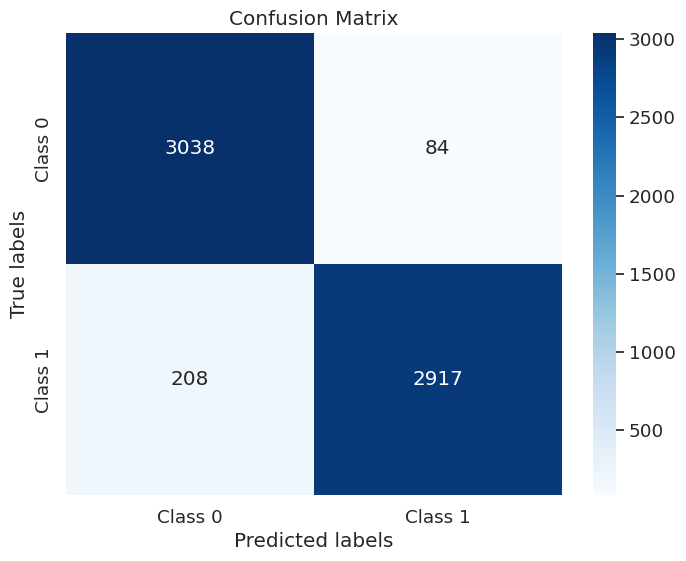

In [39]:
cm = confusion_matrix(y_test, y_preds)
labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:

svm_X1 = SVC(probability=True)  # Set probability parameter to True for soft voting


In [43]:
voting_clf_soft = VotingClassifier(estimators=[
    ('logreg', logreg_X),
    ('rf', rf_X),
    ('svm', svm_X1),
    ('dt', dt_X),
    ('et', et_X)
], voting='soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)


In [47]:
accuracy_s = accuracy_score(y_test, y_pred_soft)
precision_s = precision_score(y_test, y_pred_soft)
recall_s = recall_score(y_test, y_pred_soft)
f1_s = f1_score(y_test, y_pred_soft)

In [48]:
print("Accuracy:", accuracy_s)
print("Precision:", precision_s)
print("Recall:", recall_s)
print("F1-score:", f1_s)


Accuracy: 0.9505362574035537
Precision: 0.962853385930309
Recall: 0.93728
F1-score: 0.9498946002918761
